##Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import nltk
import string
import re
from bs4 import BeautifulSoup
from tqdm import tqdm

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer


from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Data Import

In [ ]:
con = sqlite3.connect('/content/drive/MyDrive/Dataset/database.sqlite')
cur = con.cursor()

#To get details of all tables in datset
cur.execute("Select name from sqlite_master where type = 'table';")
cur.fetchall()

#For complete datset file
data = pd.read_sql_query('Select * from sqlite_master',con)
data

#Getting the table col info
table_col = pd.read_sql_query('Pragma table_info(Reviews)',con)
table_col

In [ ]:
#Imporating data only 5000
data = pd.read_sql_query('Select * from reviews where Score != 3 limit 10 ',con)
data

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8   9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9  10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   
8                     1                       1      5  1322006400   
9                     0                       0      5  1351209600   

                                         Summary  \
0                          Good Quality Dog Food   
1                              Not as Advertised   
2                          "Delight" says it all   
3                                 Cough Medicine   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   
8                                     Yay Barley   
9                               Healthy Dog Food   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
2  This is a confection that has been around a fe...  
3  If you are looking for the secret ingredient i...  
4  Great taffy at a great price.  There was a wid...  
5  I got a wild hair for taffy and ordered this f...  
6  This saltwater taffy had great flavors and was...  
7  This taffy is so good.  It is very soft and ch...  
8  Right now I'm mostly just sprouting this so my...  
9  This is a very healthy dog food. Good for thei...

In [ ]:

print(' The number of uniquie Reviews')
print(len(df['Text'].unique()))

print(' The number of uniquie products')
print(len(df['ProductId'].unique()))

print(' The number of uniquie Users')
print(len(df['UserId'].unique()))



#Data EDA

In [ ]:
df = data.copy()

In [ ]:
df.shape

(10, 10)

In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
# WE have this many number of duplicated data 
[df.duplicated(subset=['ProductId', 'UserId', 'ProfileName','Text']).sum()]

[0]

In [ ]:
df = df.sort_values('ProductId',axis = 0,ascending=True)

In [ ]:
# Dropping duplicated data and remeaning dat is clean
df.shape
df.drop_duplicates(subset=['ProductId', 'UserId', 'ProfileName','Text'],inplace=True,keep='first')
df.shape

(10, 10)

In [ ]:
# Check for confomraton
[df.duplicated(subset=['ProductId', 'UserId', 'ProfileName','Text']).sum()]

[0]

In [ ]:
#NO null vlaues
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

#Data cleaning

In [ ]:
# Partition
print("Data before split")
print(df['Score'].value_counts())
# Data split on 3 

def part(x):
  if x >3:
    return 1
  else: return 0

df['Score'] = df['Score'].map(part)
df['Score'].value_counts()

Data before split
5    6
4    2
2    1
1    1
Name: Score, dtype: int64


1    8
0    2
Name: Score, dtype: int64

In [ ]:
# data text and summary has book books bread, breading to remove it 

# For text col

def clean_breads(data):
  # For Summary
  mask = data['Summary'].str.lower().str.contains("book|books|bread|breadings")
  print(data[mask].index)
  data.drop(data[mask].index, inplace = True)

  #For Text
  mask = data['Text'].str.lower().str.contains("book|books|bread|breadings")
  print(data[mask].index)
  data.drop(data[mask].index, inplace = True)

  return data

clean_breads(df)

df.shape




Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


(10, 10)

In [ ]:
df.shape

(10, 10)

In [ ]:
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]

In [ ]:
df.shape

(10, 10)

# Data cleaning

1)Begin by removing the html tags

2)Remove any punctuations or limited set of special characters like , or . or # etc.

3)Check if the word is made up of english letters and is not alpha-numeric

4)Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)

5)Convert the word to lowercase

6)Remove Stopwords 

Finally Snowball Stemming the word (it was obsereved to be better than Porter Stemming)

In [ ]:
# Randomly considering String for cleaning

sent_0 = df['Text'].values[0]
print(sent_0)

print('\n')
sent_1000 = df['Text'].values[1000]
print(sent_1000)
print('\n')

sent_1500 = df['Text'].values[1500]
print(sent_1500)
print('\n')

sent_100 = df['Text'].values[100]
print(sent_100)



Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


This black truffle oil from Italy is fabulous.  It's strong and subtle at the same time.  It's the best deal for exceptional flavor.


These seeds always grow, unlike some other brands. Every single one of my cats totally loves the resulting oat grass. There is nothing else that all five of them all agree on so unanimously.<br /><br />Thanks for such a great batch of seeds!


We have five cats - one an elderly cat of 15 years, the other four in the 9-11 year range.  The oldest cat was diagnosed a couple of months ago with the beginning stages of chronic kidney disease.  His numbers didn't warrant being on prescription food yet, but we needed to start paying attention to things like protein and phosphorus levels in his foo

In [ ]:
text = df['Text'].values[0]
text

"Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too"

In [ ]:
# For url with http

text = re.sub('http\S+','',text)
text

"Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too"

In [ ]:
# remove html tags

soup= BeautifulSoup(text,'lxml')
text = soup.get_text()
text

'Why is this $[...] when the same product is available for $[...] here? />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.'

In [ ]:
# Substitue the decontracted with real words

def dec(text):
  text = re.sub('I\'m','I am',text)
  text = re.sub('how\'re','how are',text)
  text = re.sub('how\'s','how is',text)
  text = re.sub('I\'d','I would',text)
  text = re.sub('That\'s','That is',text)

  #general
  text = re.sub('\'t','not',text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)

  return text

dec(text)

'Right now I am mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too'

In [ ]:
# Remove word with numbers

text = re.sub('\S*\d+\S*','',text)
text

'Why is this $[...] when the same product is available for $[...] here? />The Victor  and  traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.'

In [ ]:
# Remove special charecters like $ [..]


text = re.sub('[^A-Za-z0-9]+',' ',text)
print(text)

Why is this when the same product is available for here The Victor and traps are unreal of course total fly genocide Pretty stinky but only right nearby 


In [ ]:
text = re.sub('[^A-Za-z0-9]+', ' ', text)
print(text)

Why is this when the same product is available for here The Victor and traps are unreal of course total fly genocide Pretty stinky but only right nearby 


In [ ]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
# <br /><br /> ==> after the above steps, we are getting "br br"
# we are including them into stop words list
# instead of <br /> if we have <br/> these tags would have revmoved in the 1st step

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
#Merging all to list with , 
sentences = []
for text in tqdm(df['Text'].values):
  text = re.sub('http\S+','',text)  # For url
  text = BeautifulSoup(text,'lxml').get_text()
  text = dec(text)
  text = re.sub('\S*\d+\S*','',text)
  text = re.sub('[^A-Za-z0-9]',' ',text)
  text = " ".join(e.lower() for e in text.split() if e.lower not in stopwords)
  sentences.append(text.strip())  # Removes any trailing spces

 

100%|██████████| 10/10 [00:00<00:00, 1357.60it/s]


In [ ]:
sentences

['right now i am mostly just sprouting this so my cats can eat the grass they love it i rotate it around with wheatgrass and rye too',
 'this is a confection that has been around a few centuries it is a light pillowy citrus gelatin with nuts in this case filberts and it is cut into tiny squares and then liberally coated with powdered sugar and it is a tiny mouthful of heaven not too chewy and very flavorful i highly recommend this yummy treat if you are familiar with the story of c s lewis the lion the witch and the wardrobe this is the treat that seduces edmund into selling out his brother and sisters to the witch',
 'if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which was good and made some cherry soda the flavor is very medicinal',
 'this is a very healthy dog food good for their digestion also good for small puppies my dog eats her required amount at every feeding',
 'i have bought seve

#Featirization

## Bag of words

In [ ]:
vector = CountVectorizer()

# fit 
#vector.fit() to learn th dictionary  then 
#x = vector.transform() to convert matrix

# Fit transform to data and save the sparse matrix in x
x = vector.fit_transform(sentences)

#To get the dictionary created 
print(vector.get_feature_names())

print(x.shape)


print(x.toarray())

(10, 227)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 1]
 [0 1 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


In [ ]:
# For N grams with unigram range(1,1)

vector1 = CountVectorizer(ngram_range =(1,1))

x1 =vector1.fit_transform(sentences)
print(x1.shape)

# For N grams with bigram range(2,2)

vector2 = CountVectorizer(ngram_range =(2,2))

x2 =vector2.fit_transform(sentences)
print(x2.shape)

# For N grams with unigram range(1,2)
vector3 = CountVectorizer(ngram_range =(1,2))

x3 =vector3.fit_transform(sentences)
print(x3.shape)

# as 227+ 373 =600


(10, 227)
(10, 373)
(10, 600)


##Tfidf

In [ ]:
# same as Countvectorizer followed by Vectorise transform 

tfidf = TfidfVectorizer()

x = tfidf.fit_transform(sentences)

print(tfidf.get_feature_names_out()[:10])  # get the feature names form model
print(x.shape)  # this is the output csr matrix
print(x.toarray())

##Word2Vec

In [ ]:
# making our model

# Converting sentences to required form
#print(sentences)

words = []
for i in sentences:
  print(i.split(' '))
  words.append(i.split(' '))

print(words)

['right', 'now', 'i', 'am', 'mostly', 'just', 'sprouting', 'this', 'so', 'my', 'cats', 'can', 'eat', 'the', 'grass', 'they', 'love', 'it', 'i', 'rotate', 'it', 'around', 'with', 'wheatgrass', 'and', 'rye', 'too']
['this', 'is', 'a', 'confection', 'that', 'has', 'been', 'around', 'a', 'few', 'centuries', 'it', 'is', 'a', 'light', 'pillowy', 'citrus', 'gelatin', 'with', 'nuts', 'in', 'this', 'case', 'filberts', 'and', 'it', 'is', 'cut', 'into', 'tiny', 'squares', 'and', 'then', 'liberally', 'coated', 'with', 'powdered', 'sugar', 'and', 'it', 'is', 'a', 'tiny', 'mouthful', 'of', 'heaven', 'not', 'too', 'chewy', 'and', 'very', 'flavorful', 'i', 'highly', 'recommend', 'this', 'yummy', 'treat', 'if', 'you', 'are', 'familiar', 'with', 'the', 'story', 'of', 'c', 's', 'lewis', 'the', 'lion', 'the', 'witch', 'and', 'the', 'wardrobe', 'this', 'is', 'the', 'treat', 'that', 'seduces', 'edmund', 'into', 'selling', 'out', 'his', 'brother', 'and', 'sisters', 'to', 'the', 'witch']
['if', 'you', 'are', 

In [ ]:
import gensim

# Input is in the form   sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]

model = Word2Vec(words, min_count=1)

print(model)

#model.wv.vocab  # vocab created from model
#model.wv.vectors   list of all vectors
#model.wv.vectors.shape    vector shape
#model.wv.most_similar('text')  get most similar

# model.wv   gives the keyed dictionary whic has words as keys


Word2Vec(vocab=231, size=100, alpha=0.025)


In [ ]:
model.wv['right'].shape

(100,)

In [ ]:
# saving 
model.save("word2vec.model")

#load a model

w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print(w2v_model.wv.most_similar('great'))
print(w2v_model.wv.most_similar('worst'))


##Sentences Vectors

In [ ]:
# For each word compute vector add and divide by number of words in sent


avg_w2v = []
for sent in tqdm(words):
  sent_vec = np.zeros(100)
  word_cnt = 0
  for  word in sent:
    sent_vec += model.wv[word]
    word_cnt +=1
  if word_cnt !=0:
    avg_w2v.append(sent_vec/word_cnt)

print(len(avg_w2v))


    

100%|██████████| 10/10 [00:00<00:00, 2041.12it/s]

10


In [ ]:
len(avg_w2v[0])

100

## Tfidf weighted

In [ ]:
S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
x = model.fit_transform(S)
# we are converting a dictionary with word as a key, and the idf as a value
#dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

print(type(x))

<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

# 21 KNN

In [ ]:
data = pd.read_csv('1.ushape.csv')

In [ ]:
data.columns=['x','y','value']

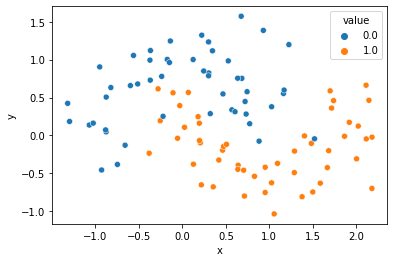

In [ ]:
sns.scatterplot(data=data,x='x',y='y',hue='value')

In [ ]:
data = np.genfromtxt('/content/1.ushape.csv', delimiter=',')

In [ ]:
def knn_compar(data,n_neighbors=15):

  X = data[:,:2]
  y = data[:,2]

  h = .02
  cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
  cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

  clf = KNeighborsClassifier(n_neighbors)
  clf.fit(X,y)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.figure()
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #defining scale on both axises
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
   
    # set the title
  plt.title('K value = '+str(n_neighbors))
    

  plt.show()

In [ ]:
knn_compar(data,1)
knn_compar(data,2)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)



In [ ]:
data = np.genfromtxt('/content/2.concerticcir1.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,2)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
data = np.genfromtxt('/content/3.concertriccir2.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,2)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
data = np.genfromtxt('/content/4.linearsep.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,2)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
data = np.genfromtxt('/content/5.outlier.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,2)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
data = np.genfromtxt('/content/6.overlap.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,3)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
data = np.genfromtxt('/content/7.xor.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,3)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
data = np.genfromtxt('/content/8.twospirals.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,3)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
data = np.genfromtxt('/content/9.random.csv', delimiter=',')
knn_compar(data,1)
knn_compar(data,3)
knn_compar(data,5)
knn_compar(data,10)
knn_compar(data,15)
knn_compar(data,30)

In [ ]:
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('/content/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


In [ ]:
X_1,X_test,y_1,y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [ ]:
X_train,X_cv,y_train,y_cv = train_test_split(X_1,y_1,test_size=0.2,random_state=42)

In [ ]:
val_cv=[]
val_train=[]
for i in range(1,30,2):
  clf = KNeighborsClassifier(n_neighbors=i)
  
  clf.fit(X_train,y_train)
  pred=clf.predict(X_train)
  acc=accuracy_score(y_train,pred,normalize=True)*100
  acc= 100-acc

  val_train.append(acc)

  pred = clf.predict(X_cv)
  

  acc = accuracy_score(y_cv,pred,normalize=True)*100
  acc= 100-acc

  val_cv.append(acc)

  print('acccuracy score for k = {} is {}'.format(i,acc))

acccuracy score for k = 1 is 14.285714285714292
acccuracy score for k = 3 is 12.857142857142861
acccuracy score for k = 5 is 15.714285714285708
acccuracy score for k = 7 is 18.57142857142857
acccuracy score for k = 9 is 17.14285714285714
acccuracy score for k = 11 is 17.14285714285714
acccuracy score for k = 13 is 14.285714285714292
acccuracy score for k = 15 is 18.57142857142857
acccuracy score for k = 17 is 20.0
acccuracy score for k = 19 is 22.857142857142847
acccuracy score for k = 21 is 24.285714285714292
acccuracy score for k = 23 is 27.142857142857153
acccuracy score for k = 25 is 30.0
acccuracy score for k = 27 is 31.42857142857143
acccuracy score for k = 29 is 31.42857142857143


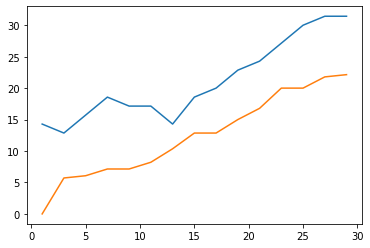

In [ ]:

plt.plot(list(range(1,30,2)),val_cv)
plt.plot(list(range(1,30,2)),val_train)


In [ ]:
cv_er = cv_

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        100, 100]])

In [ ]:
sco=[]
for i in range(1,30,2):
  clf = KNeighborsClassifier(n_neighbors=i)
  score= cross_val_score(clf,X_1,y_1,cv=10,scoring='accuracy')
  sco.append(score.mean())

print(sco)

[0.8828571428571429, 0.8885714285714286, 0.9085714285714286, 0.8914285714285715, 0.8742857142857143, 0.8600000000000001, 0.8542857142857143, 0.8485714285714285, 0.8628571428571428, 0.8428571428571429, 0.8285714285714286, 0.8200000000000001, 0.7828571428571428, 0.7685714285714286, 0.76]


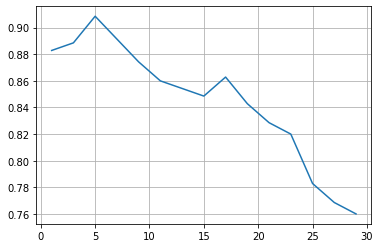

In [ ]:
plt.plot(list(range(1,30,2)),sco)
plt.grid()

In [ ]:
max(sco)

0.9085714285714286

In [ ]:
string = "Explain about K-Nearest Neighbors?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2927/k-nearest-neighbours-geometric-intuition-with-a-toy-example/3/module-3-foundations-of-natural-language-processing-and-machine-learning, Failure cases of KNN?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2928/failure-cases-of-knn/3/module-3-foundations-of-natural-language-processing-and-machine-learning,Define Distance measures: Euclidean(L2) , Manhattan(L1), Minkowski,  Hamminghttps://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2929/distance-measures-euclideanl2-manhattanl1-minkowski-hamming/3/module-3-foundations-of-natural-language-processing-and-machine-learning,What is Cosine Distance & Cosine Similarity?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2930/cosine-distance-cosine-similarity/3/module-3-foundations-of-natural-language-processing-and-machine-learning,How to measure the effectiveness of k-NN?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2931/how-to-measure-the-effectiveness-of-k-nn/3/module-3-foundations-of-natural-language-processing-and-machine-learning,
Limitations of KNN?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2933/knn-limitations/3/module-3-foundations-of-natural-language-processing-and-machine-learning,
 
How to handle Overfitting and Underfitting in KNN?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2935/overfitting-and-underfitting/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
Need for Cross validation?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2936/need-for-cross-validation/3/module-3-foundations-of-natural-language-processing-and-machine-learning,
 ,
What is K-fold cross validation?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2937/k-fold-cross-validation/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
What is Time based splitting?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2940/time-based-splitting/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
Explain k-NN for regression?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2941/k-nn-for-regression/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
Weighted k-NN ?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2942/weighted-k-nn/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
How to build a kd-tree.?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2945/how-to-build-a-kd-tree/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
Find nearest neighbors using kd-treehttps://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2946/find-nearest-neighbours-using-kd-tree/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
What is Locality sensitive Hashing (LSH)?(
Hashing vs LSH?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2949/hashing-vs-lsh/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
LSH for cosine similarity?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2950/lsh-for-cosine-similarity/3/module-3-foundations-of-natural-language-processing-and-machine-learning
 ,
LSH for euclidean distance?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2951/lsh-for-euclidean-distance/3/module-3-foundations-of-natural-language-processing-and-machine-learning"

SyntaxError: ignored

In [ ]:
tt ="Explain about K-Nearest Neighbors?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2927/k-nearest-neighbours-geometric-intuition-with-a-toy-example/3/module-3-foundations-of-natural-language-processing-and-machine-learning, Failure cases of KNN?https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2928/failure-cases-of-knn/3/module-3-foundations-of-natural-language-processing-and-machine-learning"

In [ ]:
tt = re.sub('https\S+','',tt)

In [ ]:
tt

'Explain about K-Nearest Neighbors? Failure cases of KNN?'

#Logistic reg

In [ ]:
#code source: http://occam.olin.edu/sites/default/files/DataScienceMaterials/machine_learning_lecture_2/Machine%20Learning%20Lecture%202.html
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer() #refer: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=.9)


#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=5)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.951219512195


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
# More Sparsity (Fewer elements of W* being non-zero) by increasing Lambda (decreasing C) 

import numpy as np

clf = LogisticRegression(C=0.1, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))


8


In [ ]:
clf = LogisticRegression(C=0.01, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))


4


In [ ]:
clf = LogisticRegression(C=0.001, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))


3


In [ ]:
clf = LogisticRegression(C=10, penalty='l1');
clf.fit(X_train, y_train);
w = clf.coef_
print(np.count_nonzero(w))

15


#Linear reg

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()


In [ ]:
print(boston.data.shape)

(506, 13)


In [ ]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [ ]:
print(boston.target)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [ ]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [ ]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [ ]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [ ]:
import sklearn
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


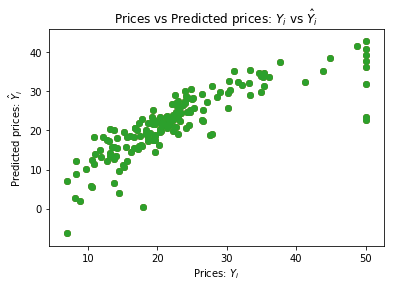

In [ ]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

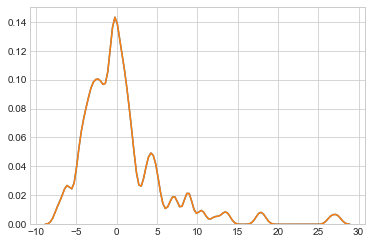

In [ ]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


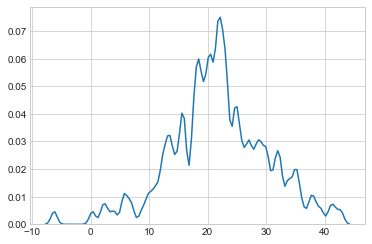

In [ ]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(Y_pred), bw=0.5)
plt.show()